In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cryptos.csv')

In [3]:
df = df[['Crypto', 'Date', 'Open', 'Low', 'High', 'Close', 'Volume', 'Market Cap', ]]

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [5]:
df.isnull().sum()

Crypto        0
Date          0
Open          0
Low           0
High          0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,19131.000000,19131.000000,19131.000000,19131.000000,1.913100e+04,1.913100e+04
mean,761.444392,738.682495,783.436833,763.837914,3.975340e+09,1.853319e+10
std,3199.816505,3084.525401,3309.109959,3215.509484,1.222030e+10,5.932182e+10
min,0.001352,0.001227,0.001509,0.001357,0.000000e+00,0.000000e+00
25%,0.206962,0.200160,0.218245,0.207531,3.635380e+06,2.346223e+08
50%,1.687292,1.621860,1.781262,1.695490,1.349885e+08,2.448265e+09
75%,74.700625,72.283853,77.416730,74.837289,1.821590e+09,9.560998e+09
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [7]:
last_month_end = np.max(df['Date'])
last_month_start = last_month_end - datetime.timedelta(30)

In [8]:
new_df = df[df['Date'] > last_month_start]

In [9]:
new_df.describe()

,Open,Low,High,Close,Volume,Market Cap
count,300.000000,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02
mean,4716.097206,4537.129486,4898.565478,4753.284602,2.942375e+10,1.199415e+11
std,13680.313980,13152.946432,14193.260865,13773.175728,4.578569e+10,2.516386e+11
min,0.282152,0.279825,0.336867,0.305702,5.125454e+08,6.802946e+09
25%,0.885879,0.825905,0.936482,0.902019,3.538339e+09,1.209396e+10
50%,26.960933,24.776142,28.890621,27.344975,7.718615e+09,2.319452e+10
75%,216.238969,195.502475,228.589628,216.242812,3.597193e+10,3.495600e+10
max,57532.738864,55672.609513,58330.572142,57539.943668,3.509679e+11,1.072263e+12


In [15]:
crypto_group = new_df.groupby('Crypto')

In [21]:
avg_market = crypto_group['Market Cap'].agg(np.mean)
avg_market = avg_market.sort_values(ascending = False)

In [22]:
avg_market

Crypto
Bitcoin      8.469910e+11
Ethereum     1.922063e+11
Tether       3.119700e+10
Cardano      2.584187e+10
Polkadot     2.482554e+10
Binance      2.319925e+10
XRP          2.210151e+10
Litecoin     1.214519e+10
ChainLink    1.142647e+10
Stellar      9.480475e+09
Name: Market Cap, dtype: float64

Text(0.5, 1.0, 'Market Cap of most recent month')

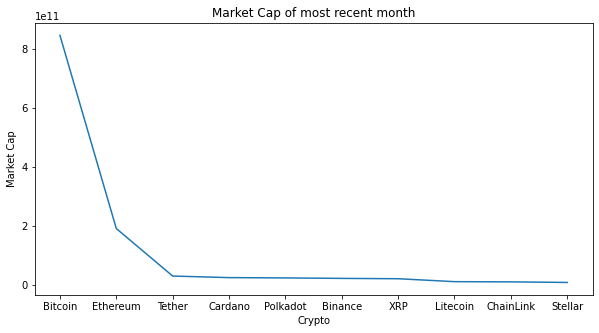

In [30]:
plt.plot(avg_market)
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('Crypto')
plt.ylabel('Market Cap')
plt.title('Market Cap of most recent month')